# Análise de ruído dos conjuntos de treinamento e classificação

In [1]:
####################PACOTES###########################
%matplotlib inline
import numpy as np
import pylab as py
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Latex
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix

#######################################################

# Rodando os dados sintéticos para 5% de ruído

## Dado sintético T1:

In [2]:
data = pd.read_csv("../inputs/dados_sint_T1.txt", sep='\s+',header=0,s )

### Avaliando o dado

In [3]:
data.head()

,Litologia,codigo,prof,dens,gama,rho,vel
0,folhelho,1,1,2.57,96.9,9290.0,2.78
1,folhelho,1,2,2.52,105.0,10200.0,2.84
2,folhelho,1,3,2.55,95.1,9930.0,2.96
3,folhelho,1,4,2.53,97.1,9930.0,3.15
4,folhelho,1,5,2.58,94.9,10300.0,2.96


In [4]:
data.shape

(697, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 7 columns):
Litologia    697 non-null object
codigo       697 non-null int64
prof         697 non-null int64
dens         697 non-null float64
gama         697 non-null float64
rho          697 non-null float64
vel          697 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 38.2+ KB


### Visualizando o dado

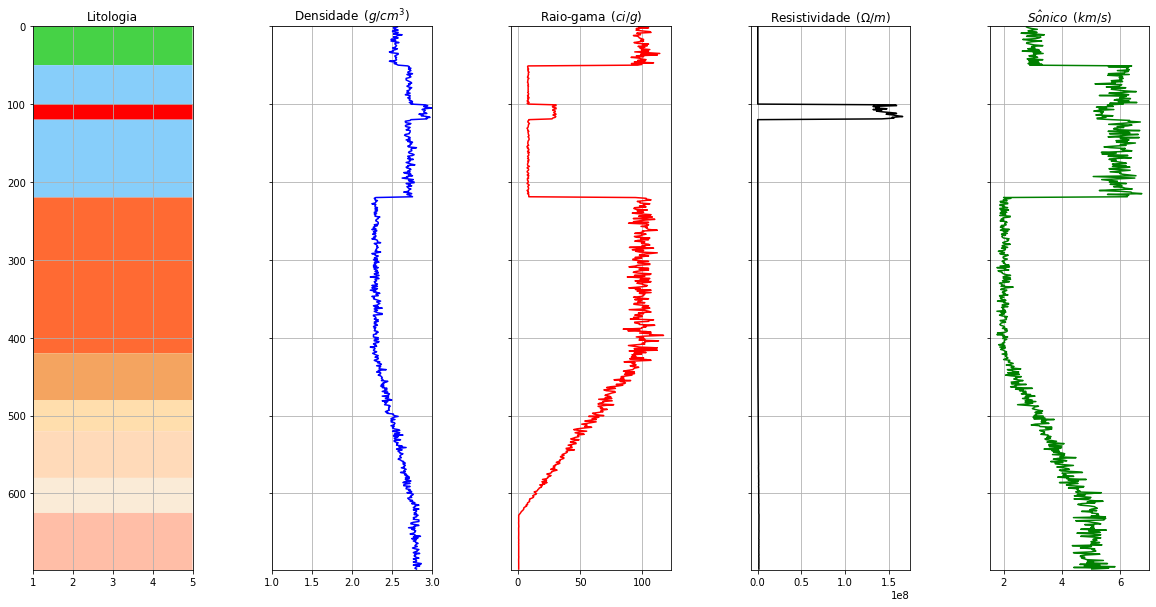

In [6]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço T1:

poco = np.loadtxt("../inputs/dados_sint_T1.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 50, where=50 >= 0, facecolor='limegreen', alpha=0.9 , interpolate=True)
ax1.fill_between(cod, 50, 100, where=50 <= 100,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 100, 120, where=100 <= 120, facecolor='red', interpolate=True)
ax1.fill_between(cod, 120, 220, where=120 <= 220,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 220, 420, where=220 <= 420,  facecolor='orangered',alpha=0.8 , interpolate=True)
ax1.fill_between(cod, 420, 480, where=420 <= 480, facecolor='sandybrown', interpolate=True)
ax1.fill_between(cod, 480, 520, where=480 <= 520, facecolor='navajowhite', interpolate=True)
ax1.fill_between(cod, 520, 580, where=520 <= 580, facecolor='peachpuff', interpolate=True)
ax1.fill_between(cod, 580, 625, where=580 <= 625, facecolor='antiquewhite', interpolate=True)
ax1.fill_between(cod, 625, 700, where=625 <= 700, facecolor='coral',alpha=0.5 , interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/t1drilling5%.png') 
plt.show()

## Gerando o dataframe

In [7]:
df=pd.DataFrame(data)
#df=df.drop([0])#retira cabeçalho
#df=df.drop('Litologia',axis=1)#retira a coluna litologia
df=df.drop('codigo',axis=1) #retira a coluna codigo
df=df.drop('prof',axis=1) #retira a coluna prof
#print(df)
#scatter_matrix(df, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

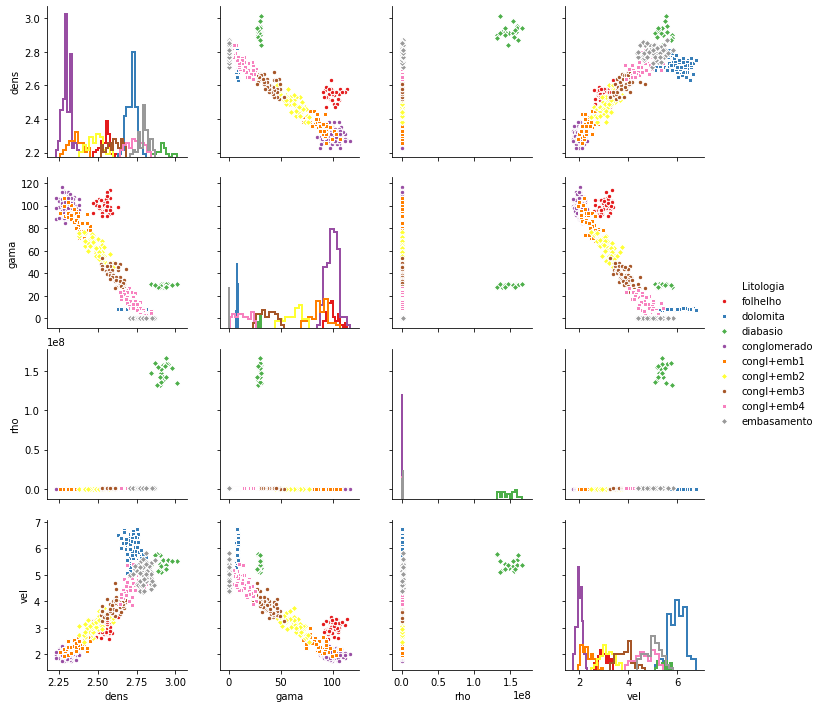

In [8]:
g = sns.PairGrid(df, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_T1.png')

In [9]:
#sns.pairplot(df, kind="scatter", hue="Litologia", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
#plt.show()

### Conjunto de dados de classificação (c1)

In [10]:
data2 = pd.read_csv("../inputs/dados_sint_c1.txt", sep='\s+',header=0,nrows=698 )

### Visualizando o dado

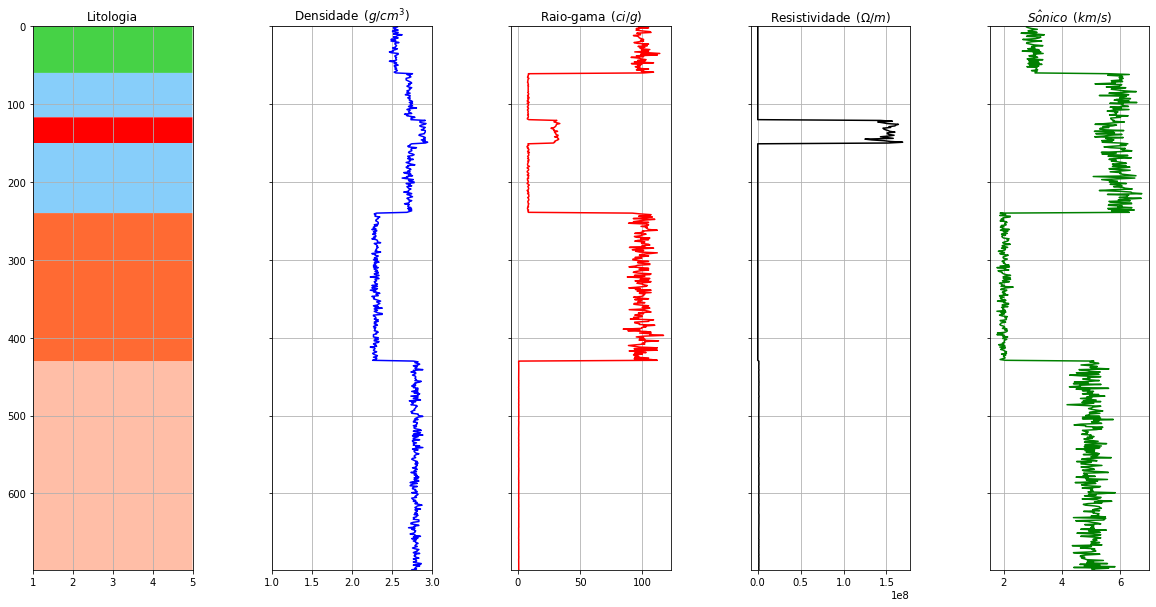

In [11]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C1:

poco = np.loadtxt("../inputs/dados_sint_c1.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 430, where=240 <= 430, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 430, 700, where=430 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c1drilling5%.png') 
plt.show()

In [12]:
df2=pd.DataFrame(data2)
df2=df2.drop([0])
#df2=df2.drop('Litologia',axis=1)#retira a coluna litologia
df2=df2.drop('codigo',axis=1) #retira a coluna codigo
df2=df2.drop('prof',axis=1) #retira a coluna prof
#print(df2)

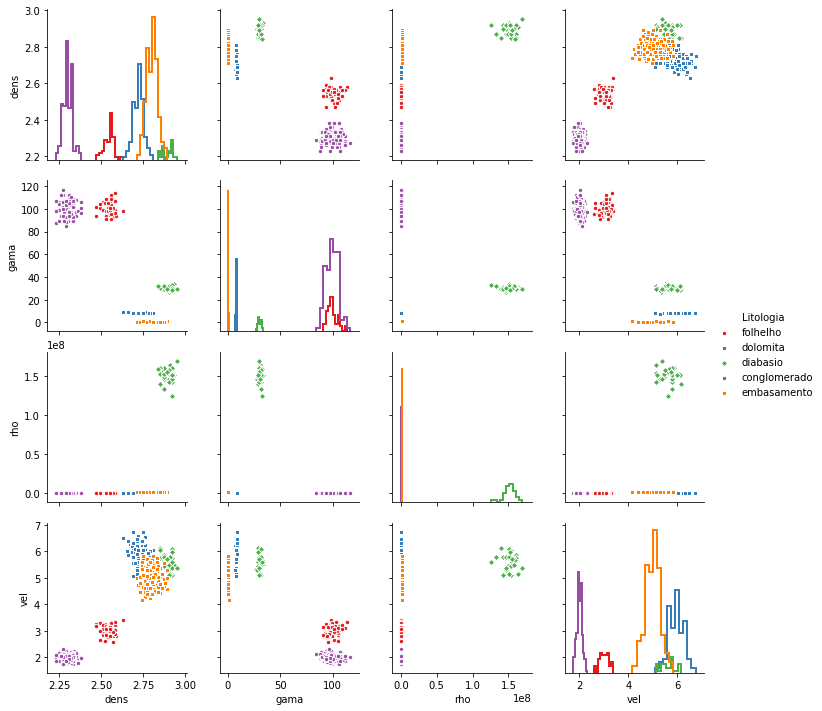

In [13]:
g = sns.PairGrid(df2, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c1.png')

### Conjunto de dados de classificação (c2)

In [14]:
data3 = pd.read_csv("../inputs/dados_sint_c2.txt", sep='\s+',header=0,nrows=698 )

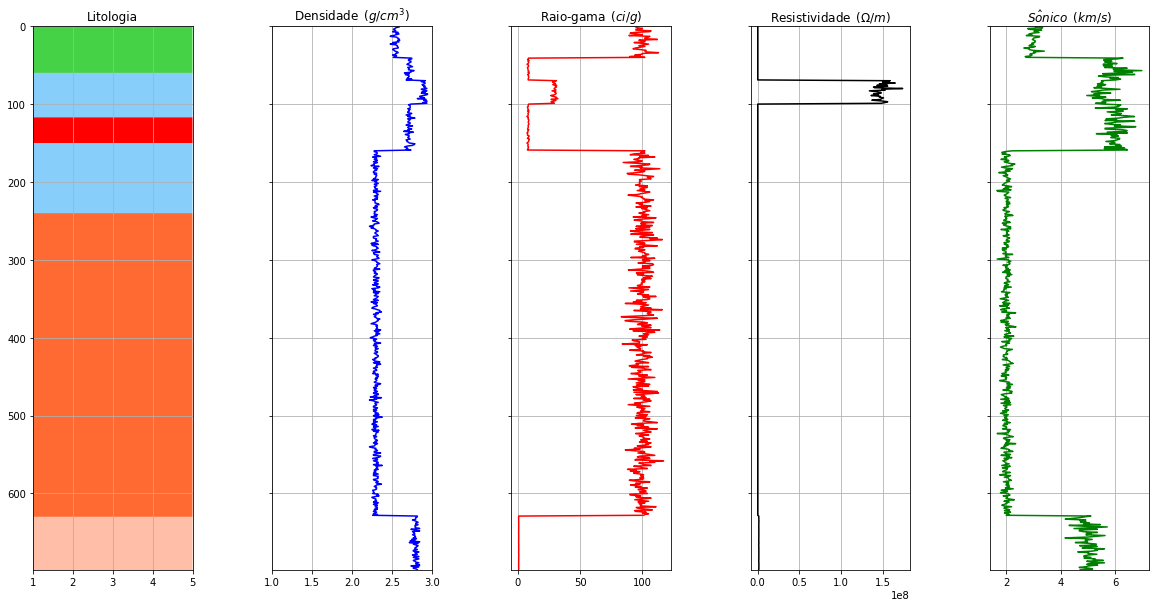

In [15]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C1:

poco = np.loadtxt("../inputs/dados_sint_c2.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 630, where=240 <= 630, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 630, 700, where=630 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c2drilling5%.png') 
plt.show()

In [16]:
df3=pd.DataFrame(data3)
df3=df3.drop([0])
#df3=df3.drop('Litologia',axis=1)#retira a coluna litologia
df3=df3.drop('codigo',axis=1) #retira a coluna codigo
df3=df3.drop('prof',axis=1) #retira a coluna prof
#print df3

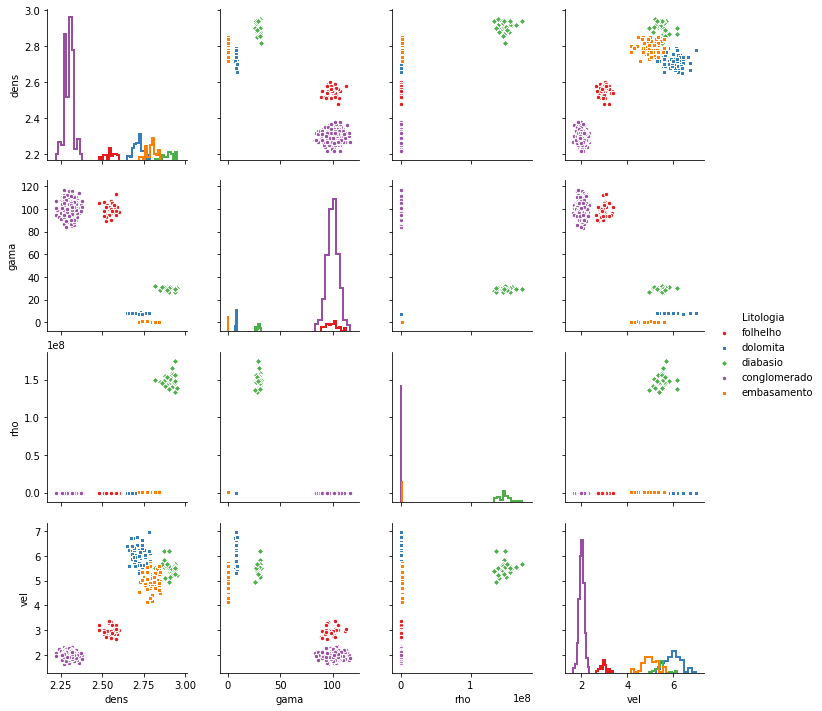

In [17]:
g = sns.PairGrid(df3, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c2.png')

# Refazendo o teste para 10% de ruído 

## Dado sintético T1:

### Avalliando o dado 

In [18]:
data10 = pd.read_csv("../inputs/dados_sint_T1_r10%.txt", sep='\s+',header=0,nrows=698 )

In [19]:
data.head()

,Litologia,codigo,prof,dens,gama,rho,vel
0,folhelho,1,1,2.57,96.9,9290.0,2.78
1,folhelho,1,2,2.52,105.0,10200.0,2.84
2,folhelho,1,3,2.55,95.1,9930.0,2.96
3,folhelho,1,4,2.53,97.1,9930.0,3.15
4,folhelho,1,5,2.58,94.9,10300.0,2.96


In [20]:
data.shape

(697, 7)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 7 columns):
Litologia    697 non-null object
codigo       697 non-null int64
prof         697 non-null int64
dens         697 non-null float64
gama         697 non-null float64
rho          697 non-null float64
vel          697 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 38.2+ KB


### Visualizando o dado

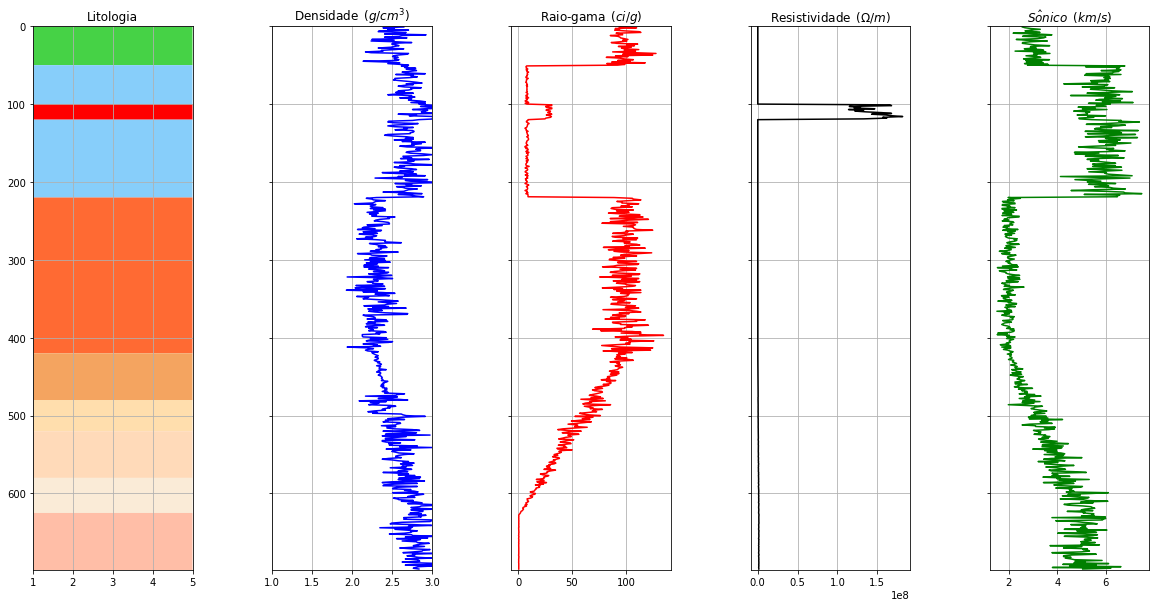

In [22]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço T1:

poco = np.loadtxt("../inputs/dados_sint_T1_r10%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 50, where=50 >= 0, facecolor='limegreen', alpha=0.9 , interpolate=True)
#ax1.legend([(0, 50), ], ['Folhelho'])
ax1.fill_between(cod, 50, 100, where=50 <= 100,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 100, 120, where=100 <= 120, facecolor='red', interpolate=True)
ax1.fill_between(cod, 120, 220, where=120 <= 220,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 220, 420, where=220 <= 420,  facecolor='orangered',alpha=0.8 , interpolate=True)
ax1.fill_between(cod, 420, 480, where=420 <= 480, facecolor='sandybrown', interpolate=True)
ax1.fill_between(cod, 480, 520, where=480 <= 520, facecolor='navajowhite', interpolate=True)
ax1.fill_between(cod, 520, 580, where=520 <= 580, facecolor='peachpuff', interpolate=True)
ax1.fill_between(cod, 580, 625, where=580 <= 625, facecolor='antiquewhite', interpolate=True)
ax1.fill_between(cod, 625, 700, where=625 <= 700, facecolor='coral',alpha=0.5 , interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/t1drilling10%.png') 
plt.show()

### Gerando o Dataframe

In [23]:
df10=pd.DataFrame(data10)
df10=df10.drop('codigo',axis=1) #retira a coluna codigo
df10=df10.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

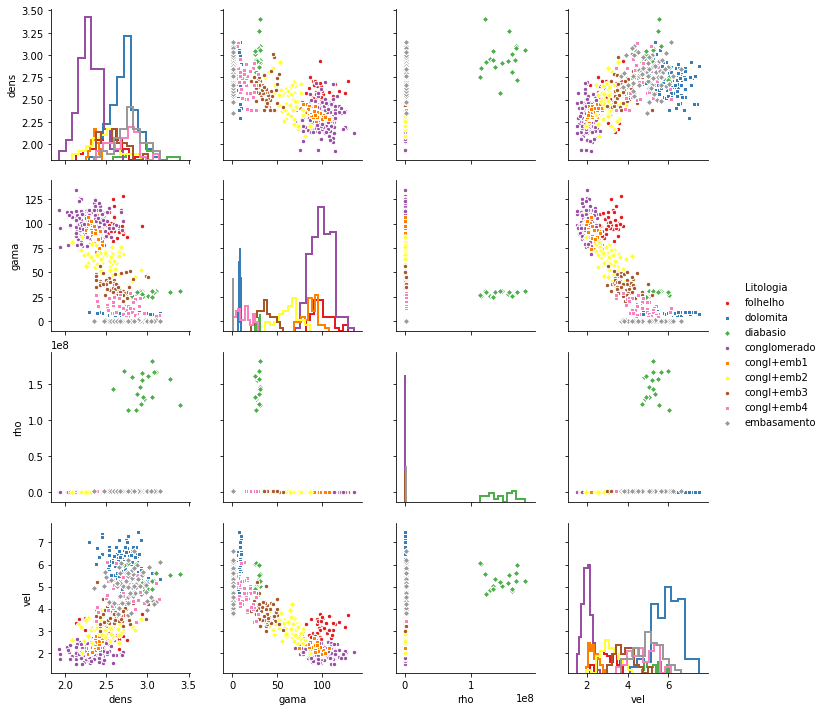

In [24]:
g = sns.PairGrid(df10, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_T1_r10%.png')

## Dado sintético C1 com 10 % de ruído

In [25]:
data2_10 = pd.read_csv("../inputs/dados_sint_c1_r10%.txt", sep='\s+',header=0,nrows=698 )

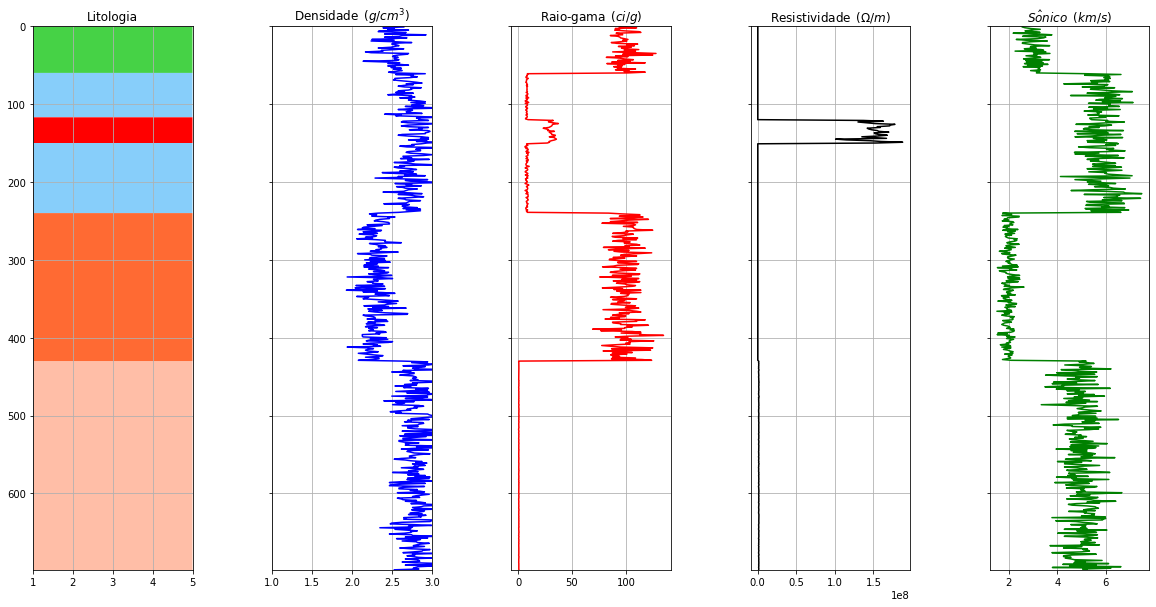

In [26]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C1:

poco = np.loadtxt("../inputs/dados_sint_c1_r10%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 430, where=240 <= 430, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 430, 700, where=430 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c1drilling10%.png') 
plt.show()

In [27]:
df2_10=pd.DataFrame(data2_10)
df2_10=df2_10.drop('codigo',axis=1) #retira a coluna codigo
df2_10=df2_10.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

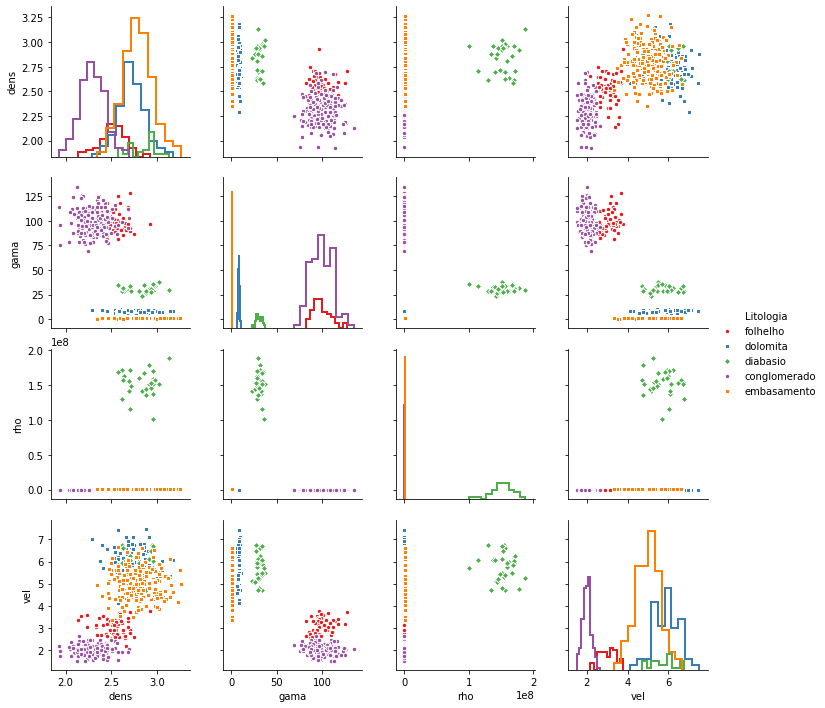

In [28]:
g = sns.PairGrid(df2_10, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c1_r10%.png')

### Dado sintético C2 com 10% de ruído

In [29]:
data3_10 = pd.read_csv("../inputs/dados_sint_c2_r10%.txt", sep='\s+',header=0,nrows=698 )

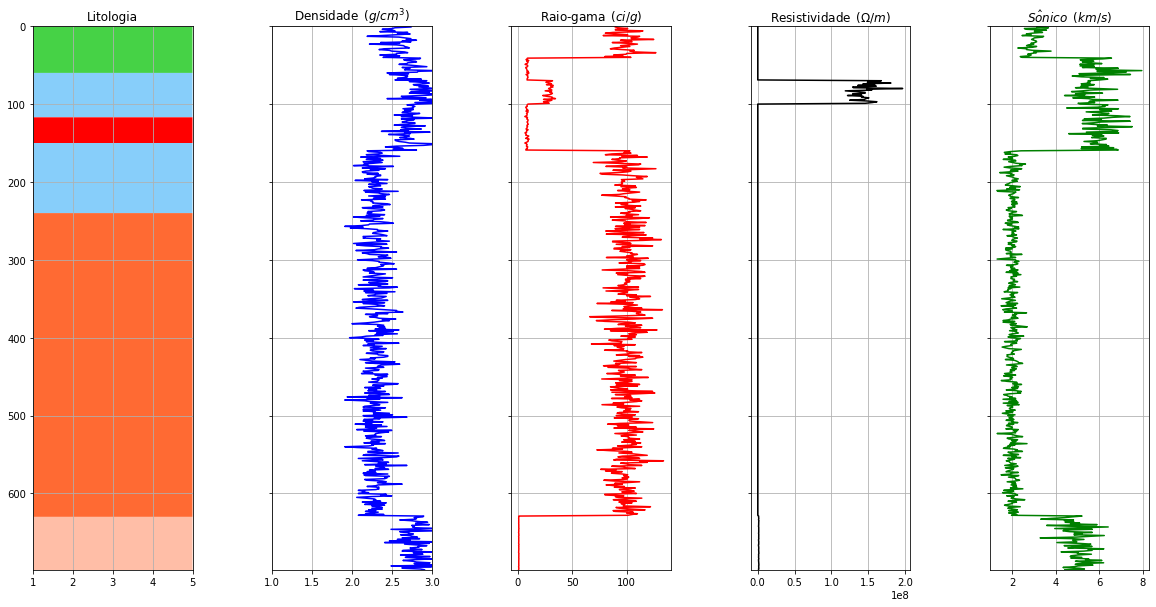

In [30]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C1:

poco = np.loadtxt("../inputs/dados_sint_c2_r10%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 630, where=240 <= 630, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 630, 700, where=630 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c2drilling10%.png') 
plt.show()

In [31]:
df3_10=pd.DataFrame(data3_10)
df3_10=df3_10.drop('codigo',axis=1) #retira a coluna codigo
df3_10=df3_10.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

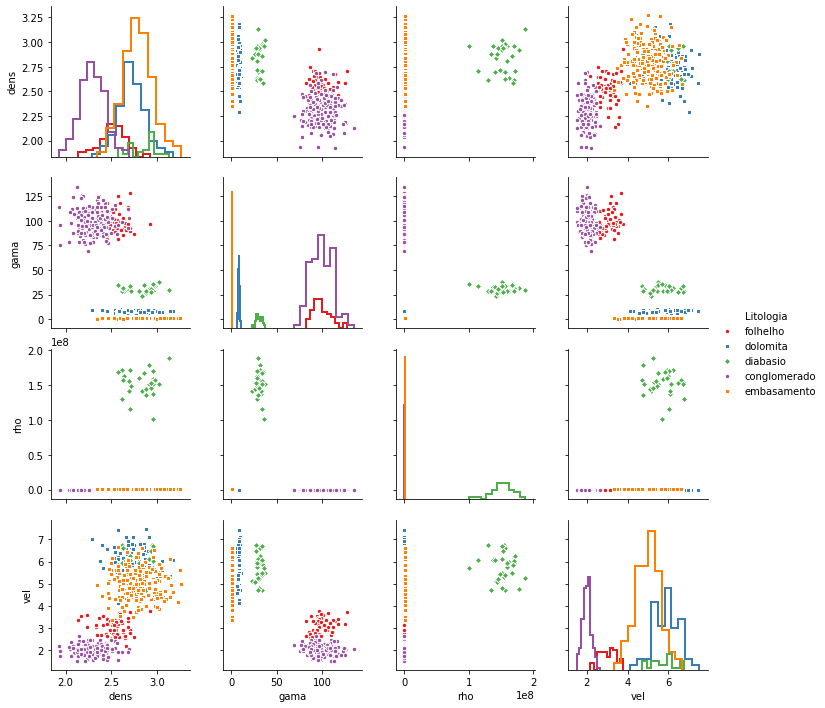

In [32]:
g = sns.PairGrid(df2_10, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c2_r10%.png')

# Refazendo o teste para 15% de ruído 

## Dado Sintético T1 com 15% de ruído:

### Avaliando o dado

In [33]:
data15 = pd.read_csv("../inputs/dados_sint_T1_r15%.txt", sep='\s+',header=0,nrows=698 )

In [34]:
data.head()

,Litologia,codigo,prof,dens,gama,rho,vel
0,folhelho,1,1,2.57,96.9,9290.0,2.78
1,folhelho,1,2,2.52,105.0,10200.0,2.84
2,folhelho,1,3,2.55,95.1,9930.0,2.96
3,folhelho,1,4,2.53,97.1,9930.0,3.15
4,folhelho,1,5,2.58,94.9,10300.0,2.96


In [35]:
data.shape

(697, 7)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 7 columns):
Litologia    697 non-null object
codigo       697 non-null int64
prof         697 non-null int64
dens         697 non-null float64
gama         697 non-null float64
rho          697 non-null float64
vel          697 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 38.2+ KB


### Visualizando o dado

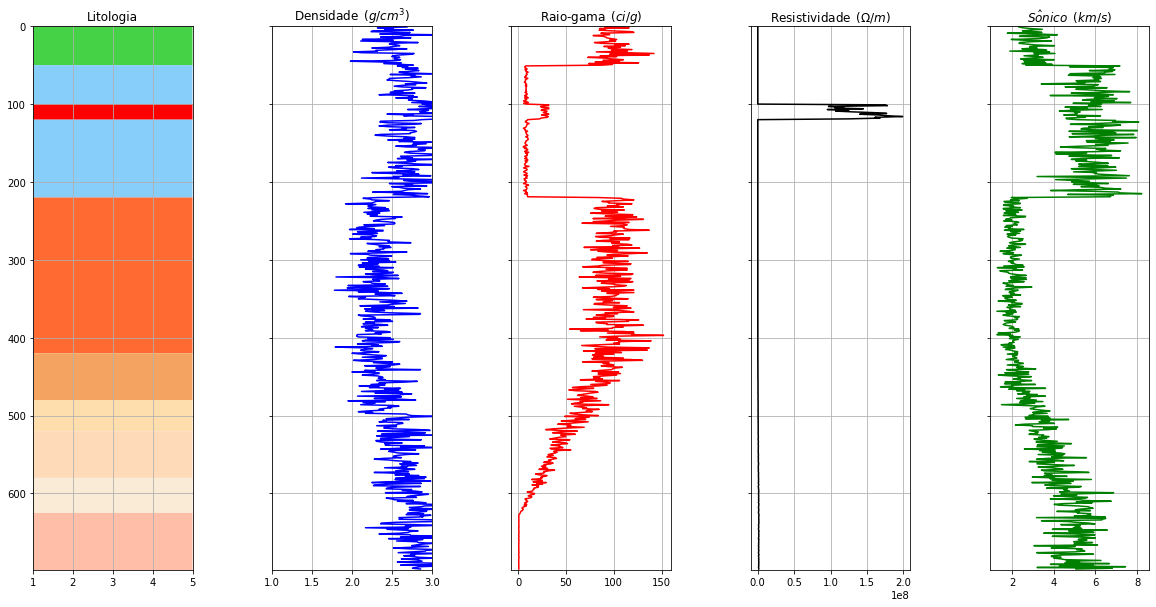

In [37]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço T1:

poco = np.loadtxt("../inputs/dados_sint_T1_r15%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 50, where=50 >= 0, facecolor='limegreen', alpha=0.9 , interpolate=True)
#ax1.legend([(0, 50), ], ['Folhelho'])
ax1.fill_between(cod, 50, 100, where=50 <= 100,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 100, 120, where=100 <= 120, facecolor='red', interpolate=True)
ax1.fill_between(cod, 120, 220, where=120 <= 220,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 220, 420, where=220 <= 420,  facecolor='orangered',alpha=0.8 , interpolate=True)
ax1.fill_between(cod, 420, 480, where=420 <= 480, facecolor='sandybrown', interpolate=True)
ax1.fill_between(cod, 480, 520, where=480 <= 520, facecolor='navajowhite', interpolate=True)
ax1.fill_between(cod, 520, 580, where=520 <= 580, facecolor='peachpuff', interpolate=True)
ax1.fill_between(cod, 580, 625, where=580 <= 625, facecolor='antiquewhite', interpolate=True)
ax1.fill_between(cod, 625, 700, where=625 <= 700, facecolor='coral',alpha=0.5 , interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/t1drilling15%.png') 
plt.show()

### Gerando o Dataframe

In [38]:
df15=pd.DataFrame(data15)
df15=df15.drop('codigo',axis=1) #retira a coluna codigo
df15=df15.drop('prof',axis=1) #retira a coluna prof
#print(df15)
#scatter_matrix(df15, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

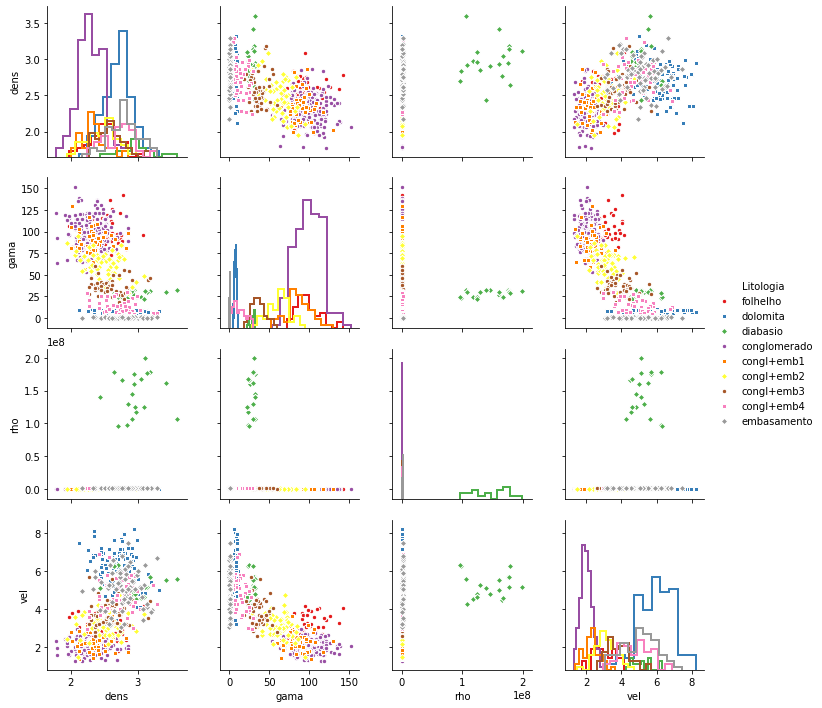

In [39]:
g = sns.PairGrid(df15, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_T1_r15%.png')

### Dado sintético C1 com 15% de ruído

In [40]:
data2_15 = pd.read_csv("../inputs/dados_sint_c1_r15%.txt", sep='\s+',header=0,nrows=698 )

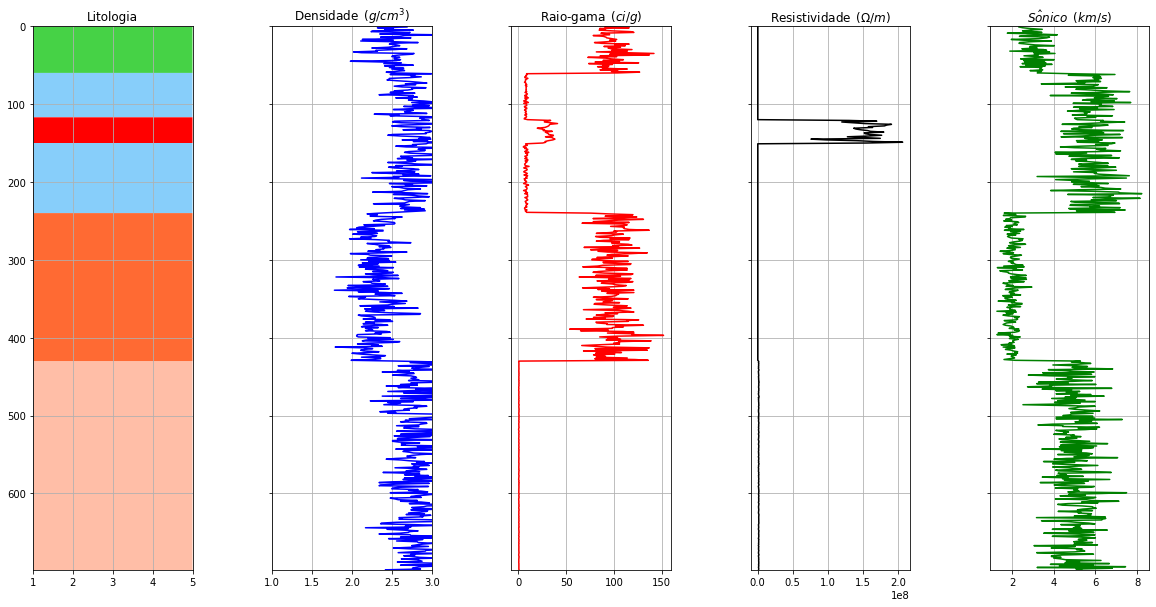

In [41]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C1:

poco = np.loadtxt("../inputs/dados_sint_c1_r15%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 430, where=240 <= 430, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 430, 700, where=430 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c1drilling15%.png') 
plt.show()

In [42]:
df2_15=pd.DataFrame(data2_15)
df2_15=df2_15.drop('codigo',axis=1) #retira a coluna codigo
df2_15=df2_15.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

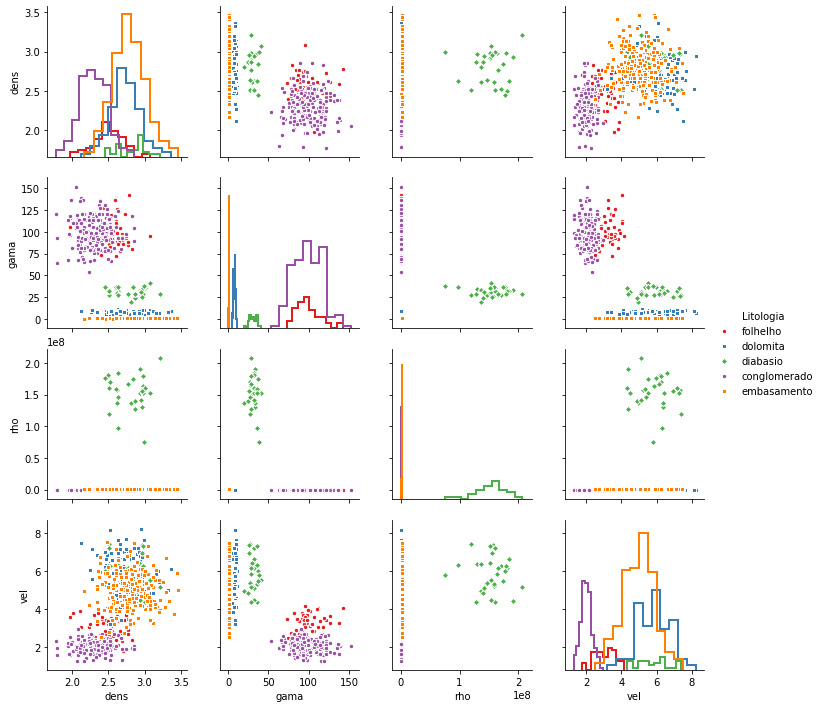

In [43]:
g = sns.PairGrid(df2_15, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c1_r15%.png')

### Dado sintético C2 com 15% de ruído

In [44]:
data3_15 = pd.read_csv("../inputs/dados_sint_c2_r15%.txt", sep='\s+',header=0,nrows=698 )

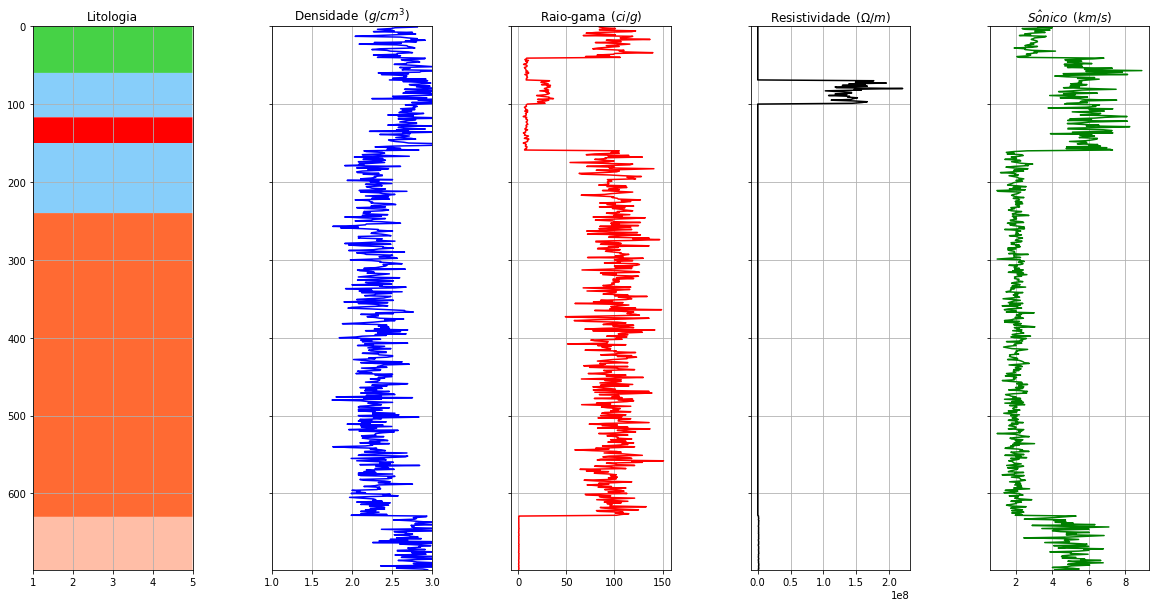

In [45]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C2:

poco = np.loadtxt("../inputs/dados_sint_c2_r15%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 630, where=240 <= 630, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 630, 700, where=630 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c2drilling15%.png') 
plt.show()

In [46]:
df3_15=pd.DataFrame(data3_15)
df3_15=df3_15.drop('codigo',axis=1) #retira a coluna codigo
df3_15=df3_15.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

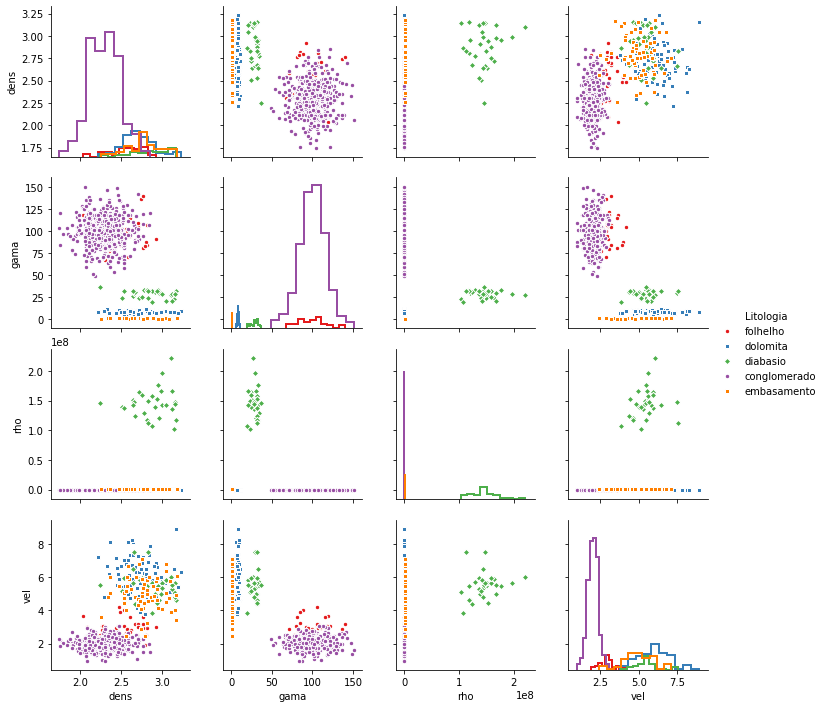

In [47]:
g = sns.PairGrid(df3_15, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c2_r15%.png')

# Refazendo o teste para 20% de ruído

## Dado Sintético T1 com 20% de ruído

### Avaliando o dado

In [48]:
data20 = pd.read_csv("../inputs/dados_sint_T1_r20%.txt", sep='\s+',header=0,nrows=698 )

In [49]:
data.head()

,Litologia,codigo,prof,dens,gama,rho,vel
0,folhelho,1,1,2.57,96.9,9290.0,2.78
1,folhelho,1,2,2.52,105.0,10200.0,2.84
2,folhelho,1,3,2.55,95.1,9930.0,2.96
3,folhelho,1,4,2.53,97.1,9930.0,3.15
4,folhelho,1,5,2.58,94.9,10300.0,2.96


In [50]:
data.shape

(697, 7)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 7 columns):
Litologia    697 non-null object
codigo       697 non-null int64
prof         697 non-null int64
dens         697 non-null float64
gama         697 non-null float64
rho          697 non-null float64
vel          697 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 38.2+ KB


### Visualizando o dado

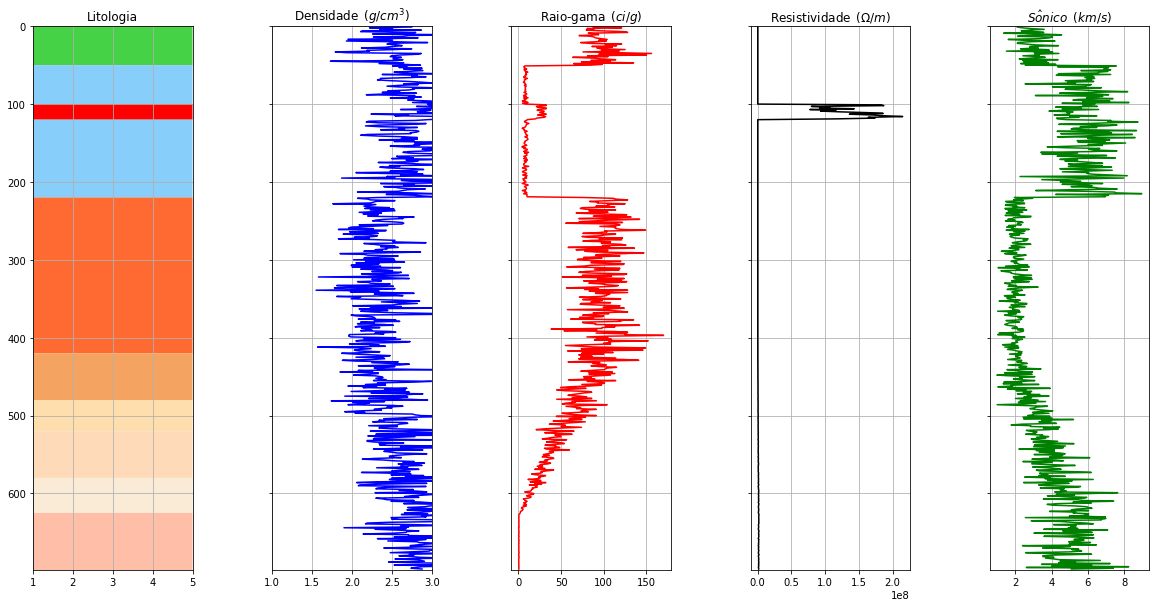

In [52]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço T1:

poco = np.loadtxt("../inputs/dados_sint_T1_r20%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 50, where=50 >= 0, facecolor='limegreen', alpha=0.9 , interpolate=True)
#ax1.legend([(0, 50), ], ['Folhelho'])
ax1.fill_between(cod, 50, 100, where=50 <= 100,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 100, 120, where=100 <= 120, facecolor='red', interpolate=True)
ax1.fill_between(cod, 120, 220, where=120 <= 220,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 220, 420, where=220 <= 420,  facecolor='orangered',alpha=0.8 , interpolate=True)
ax1.fill_between(cod, 420, 480, where=420 <= 480, facecolor='sandybrown', interpolate=True)
ax1.fill_between(cod, 480, 520, where=480 <= 520, facecolor='navajowhite', interpolate=True)
ax1.fill_between(cod, 520, 580, where=520 <= 580, facecolor='peachpuff', interpolate=True)
ax1.fill_between(cod, 580, 625, where=580 <= 625, facecolor='antiquewhite', interpolate=True)
ax1.fill_between(cod, 625, 700, where=625 <= 700, facecolor='coral',alpha=0.5 , interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/t1drilling20%.png') 
plt.show()

### Gerando o DataFrame

In [53]:
df20=pd.DataFrame(data20)
df20=df20.drop('codigo',axis=1) #retira a coluna codigo
df20=df20.drop('prof',axis=1) #retira a coluna prof
#print(df15)
#scatter_matrix(df15, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

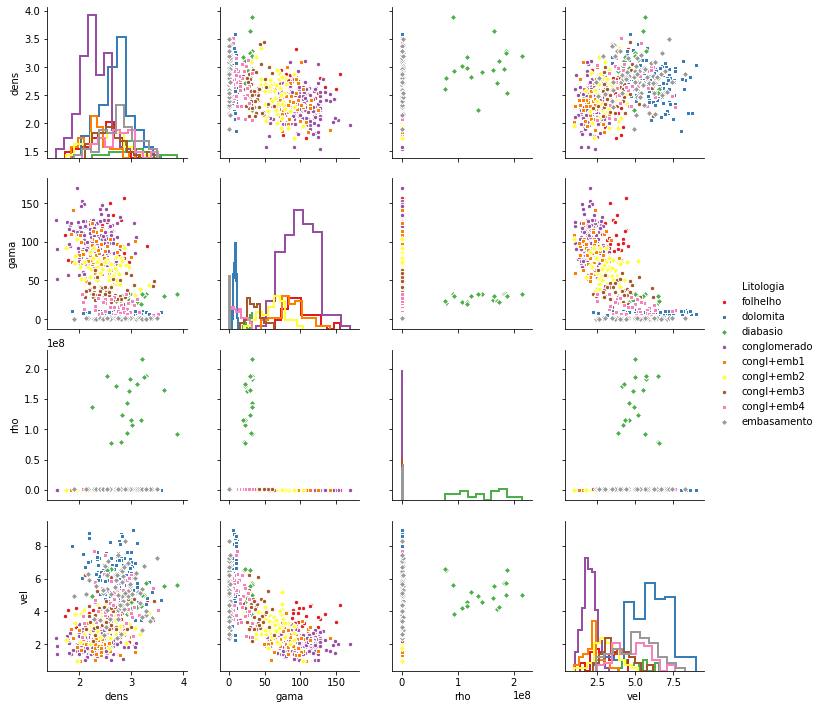

In [54]:
g = sns.PairGrid(df20, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_T1_r20%.png')

## Dado Sintético C1 com 20% de ruído

In [55]:
data2_20 = pd.read_csv("../inputs/dados_sint_c1_r20%.txt", sep='\s+',header=0,nrows=698 )

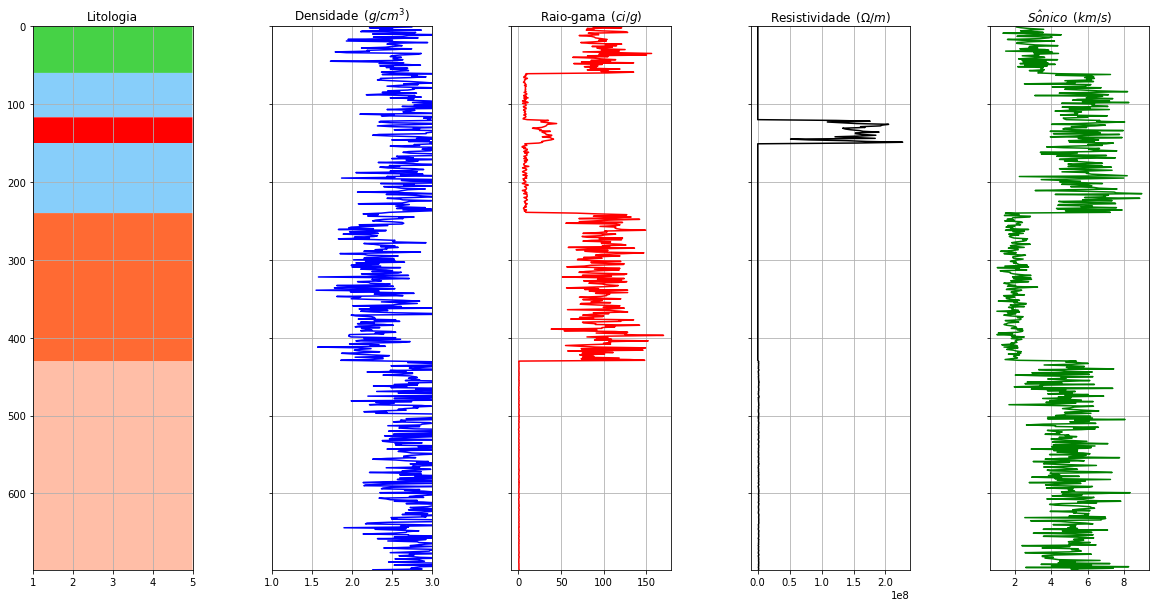

In [56]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C1:

poco = np.loadtxt("../inputs/dados_sint_c1_r20%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 430, where=240 <= 430, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 430, 700, where=430 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c1drilling20%.png') 
plt.show()

In [57]:
df2_20=pd.DataFrame(data2_20)
df2_20=df2_20.drop('codigo',axis=1) #retira a coluna codigo
df2_20=df2_20.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

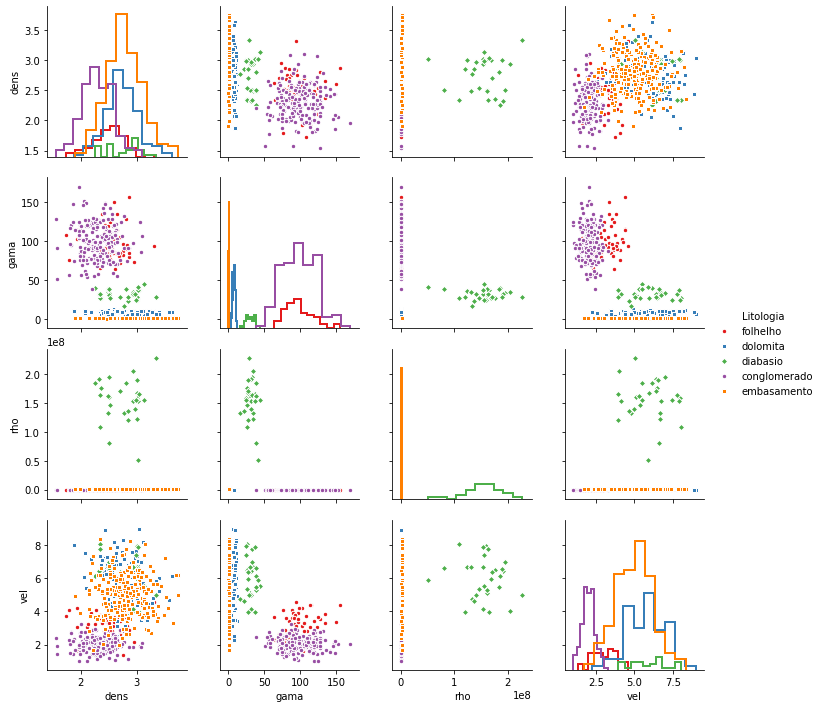

In [58]:
g = sns.PairGrid(df2_20, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c1_r20%.png')

## Dado sintético C2 com 20% de ruído

In [59]:
data3_20 = pd.read_csv("../inputs/dados_sint_c2_r20%.txt", sep='\s+',header=0,nrows=698 )

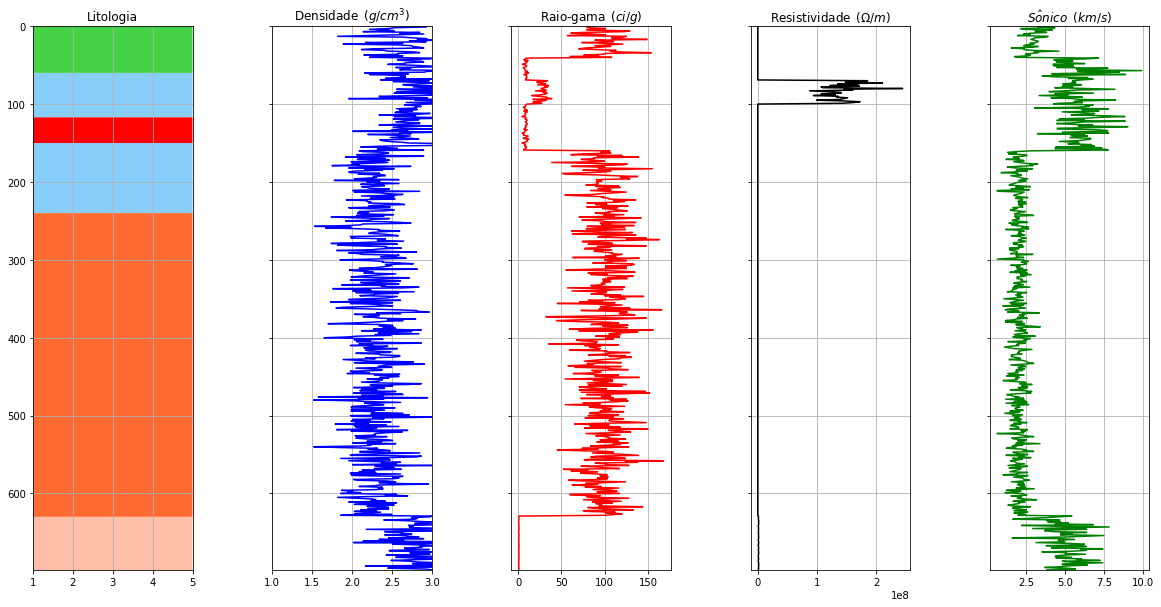

In [60]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C2:

poco = np.loadtxt("../inputs/dados_sint_c2_r20%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 630, where=240 <= 630, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 630, 700, where=630 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)
ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c2drilling20%.png') 
plt.show()

In [61]:
df3_20=pd.DataFrame(data3_20)
df3_20=df3_20.drop('codigo',axis=1) #retira a coluna codigo
df3_20=df3_20.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

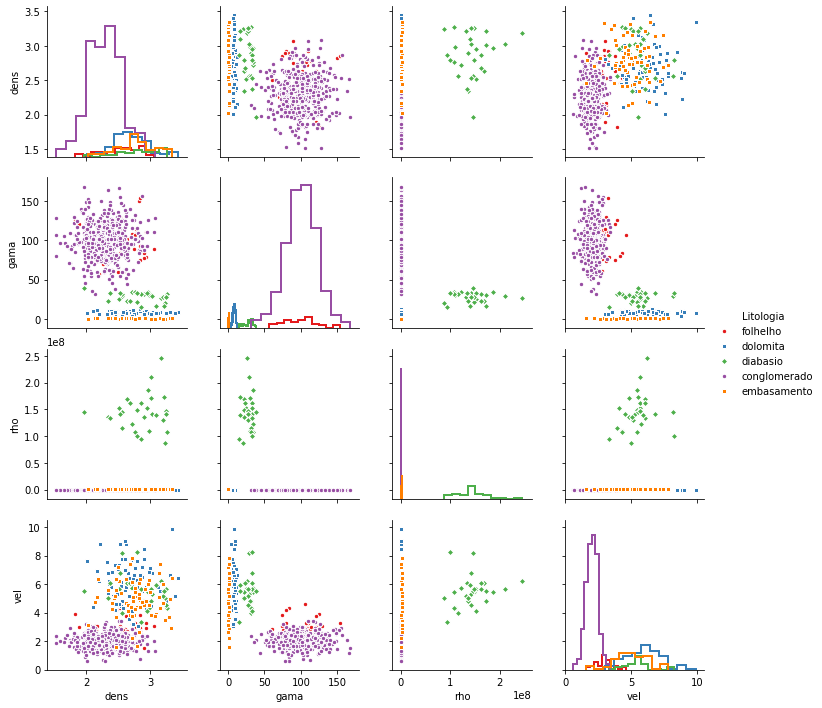

In [62]:
g = sns.PairGrid(df3_20, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c2_r20%.png')

# Refazendo o teste para 30% de ruído

## Dado sintético T1 com 30% de ruído

### Avaliando o dado 

In [63]:
data30 = pd.read_csv("../inputs/dados_sint_T1_r30%.txt", sep='\s+',header=0,nrows=698 )

In [64]:
data.head()

,Litologia,codigo,prof,dens,gama,rho,vel
0,folhelho,1,1,2.57,96.9,9290.0,2.78
1,folhelho,1,2,2.52,105.0,10200.0,2.84
2,folhelho,1,3,2.55,95.1,9930.0,2.96
3,folhelho,1,4,2.53,97.1,9930.0,3.15
4,folhelho,1,5,2.58,94.9,10300.0,2.96


In [65]:
data.shape

(697, 7)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 7 columns):
Litologia    697 non-null object
codigo       697 non-null int64
prof         697 non-null int64
dens         697 non-null float64
gama         697 non-null float64
rho          697 non-null float64
vel          697 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 38.2+ KB


### Visualizando o dado

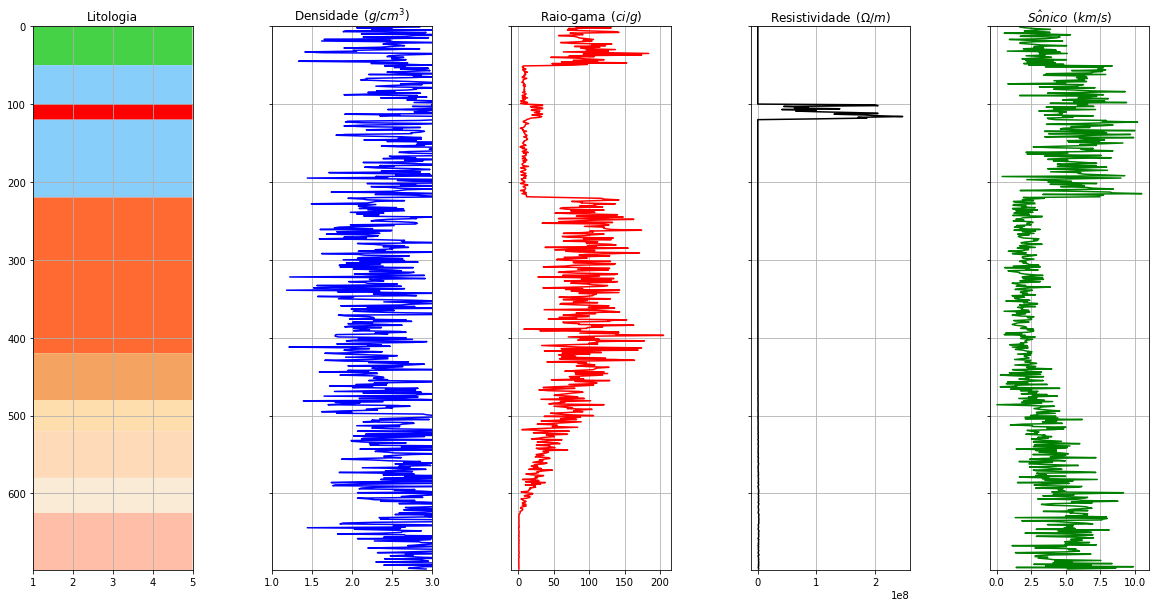

In [67]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço T1:

poco = np.loadtxt("../inputs/dados_sint_T1_r30%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 50, where=50 >= 0, facecolor='limegreen', alpha=0.9 , interpolate=True)
#ax1.legend([(0, 50), ], ['Folhelho'])
ax1.fill_between(cod, 50, 100, where=50 <= 100,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 100, 120, where=100 <= 120, facecolor='red', interpolate=True)
ax1.fill_between(cod, 120, 220, where=120 <= 220,  facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 220, 420, where=220 <= 420,  facecolor='orangered',alpha=0.8 , interpolate=True)
ax1.fill_between(cod, 420, 480, where=420 <= 480, facecolor='sandybrown', interpolate=True)
ax1.fill_between(cod, 480, 520, where=480 <= 520, facecolor='navajowhite', interpolate=True)
ax1.fill_between(cod, 520, 580, where=520 <= 580, facecolor='peachpuff', interpolate=True)
ax1.fill_between(cod, 580, 625, where=580 <= 625, facecolor='antiquewhite', interpolate=True)
ax1.fill_between(cod, 625, 700, where=625 <= 700, facecolor='coral',alpha=0.5 , interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/t1drilling30%.png') 
plt.show()

In [68]:
df30=pd.DataFrame(data30)
df30=df30.drop('codigo',axis=1) #retira a coluna codigo
df30=df30.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

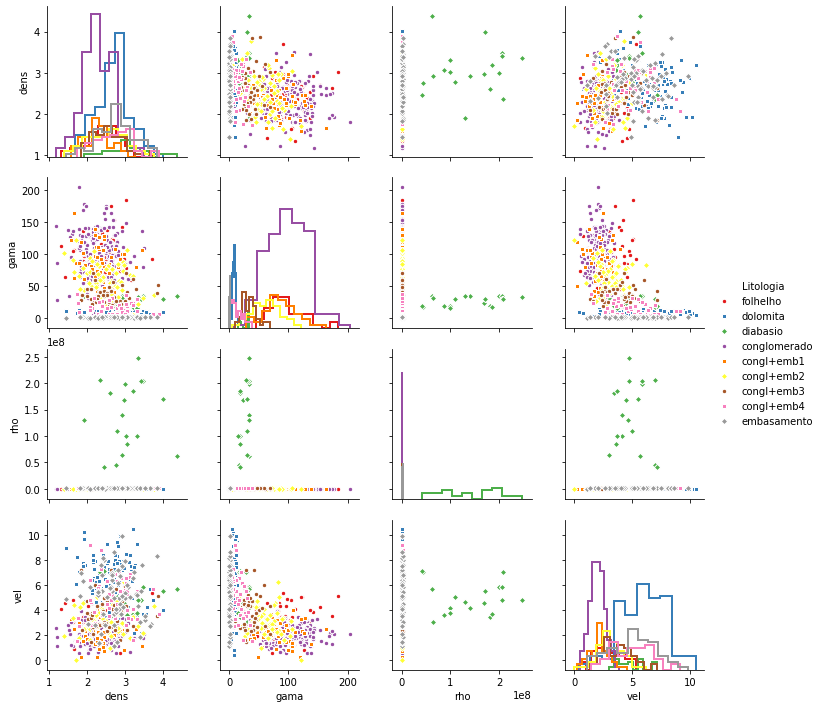

In [69]:
g = sns.PairGrid(df30, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_t1_r30%.png')

## Dado sintético C1 com 30% de ruído

In [70]:
data2_30 = pd.read_csv("../inputs/dados_sint_c1_r30%.txt", sep='\s+',header=0,nrows=698 )

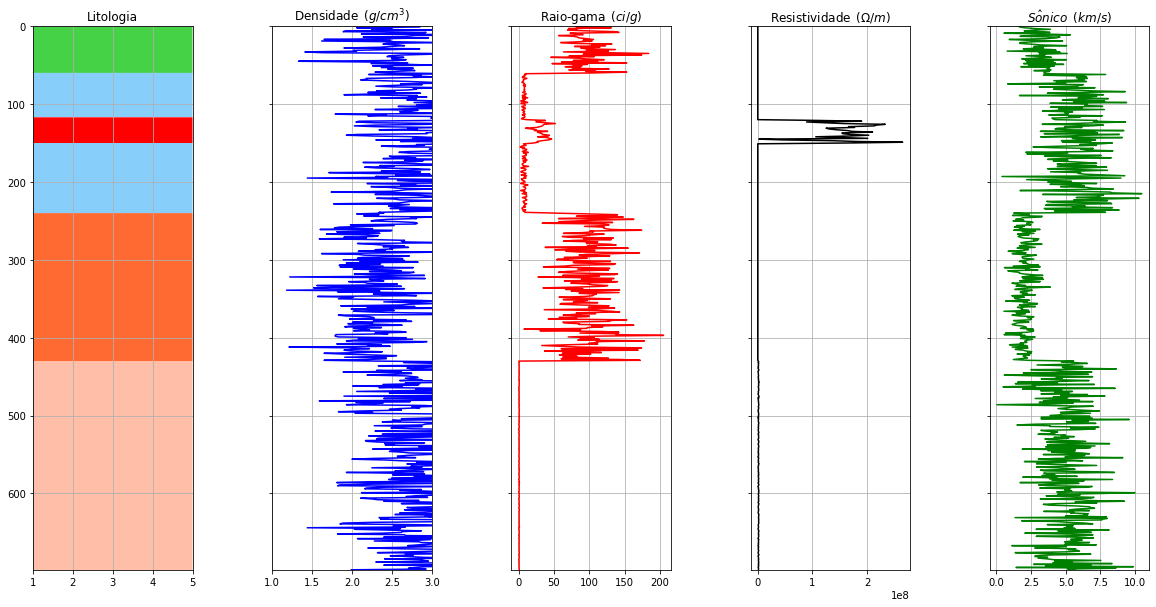

In [71]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C1:

poco = np.loadtxt("../inputs/dados_sint_c1_r30%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 430, where=240 <= 430, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 430, 700, where=430 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c1drilling30%.png') 
plt.show()

In [72]:
df2_30=pd.DataFrame(data2_30)
df2_30=df2_30.drop('codigo',axis=1) #retira a coluna codigo
df2_30=df2_30.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

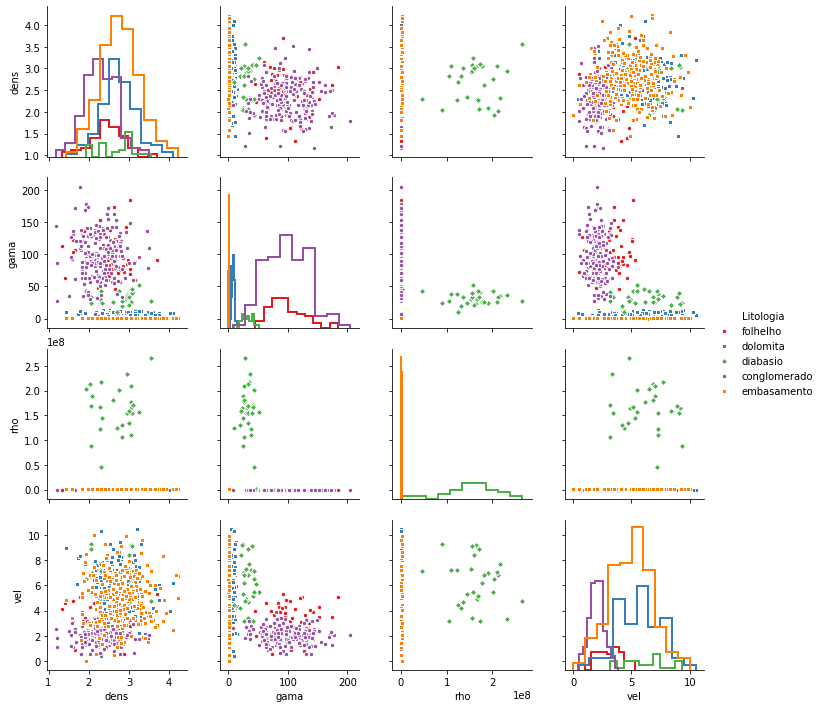

In [73]:
g = sns.PairGrid(df2_30, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c1_r30%.png')

In [74]:
## Dado sintético C2 com 30% de ruído

In [75]:
data3_30 = pd.read_csv("../inputs/dados_sint_c2_r30%.txt", sep='\s+',header=0,nrows=698 )

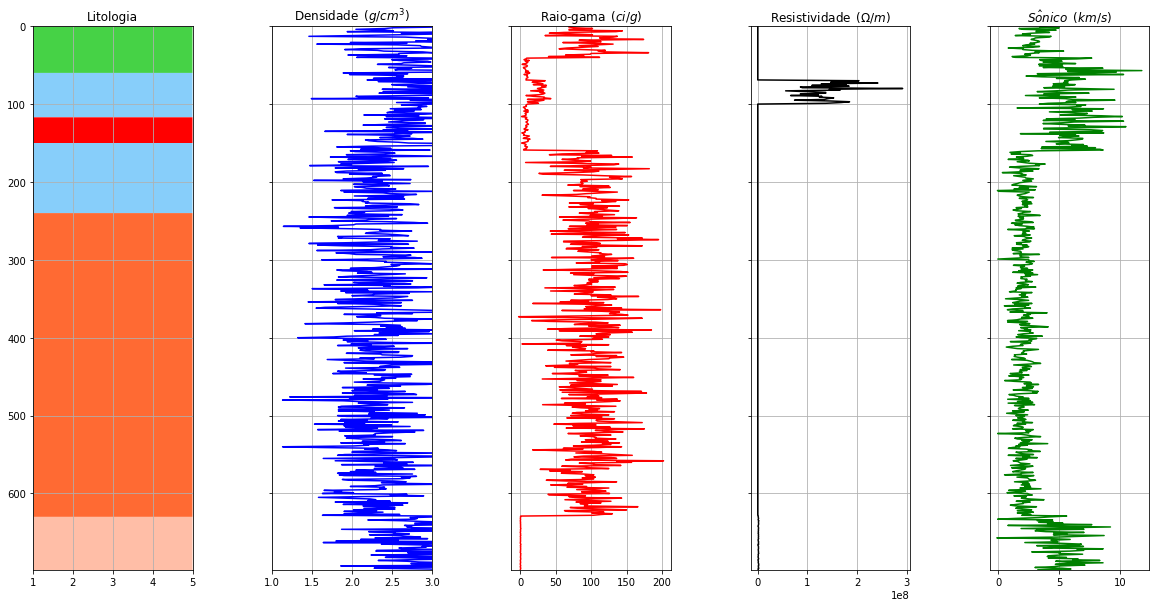

In [76]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C2:

poco = np.loadtxt("../inputs/dados_sint_c2_r30%.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
dens = poco[:,2]
rho = poco[:,4]
gama = poco[:,3]
vel = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 630, where=240 <= 630, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 630, 700, where=630 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Litologia')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)
ax2.set_ylim(top=0, bottom=698)
ax2.set_title('Densidade$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(dens, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('Raio-gama$\hspace{0.5}(ci/g$)')
ax3.plot(gama, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('Resistividade$\hspace{0.5}(\Omega/m$)')
ax4.plot(rho, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$S\^onico\hspace{0.5}(km/s$)')
ax5.plot(vel, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../outputs/c2drilling30%.png') 
plt.show()

In [77]:
df3_30=pd.DataFrame(data3_30)
df3_30=df3_30.drop('codigo',axis=1) #retira a coluna codigo
df3_30=df3_30.drop('prof',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

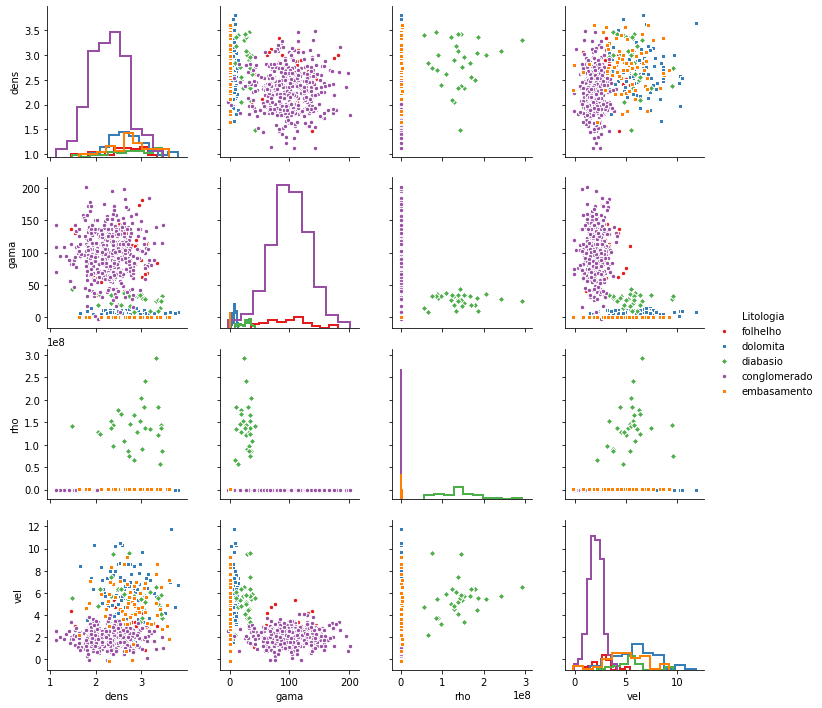

In [78]:
g = sns.PairGrid(df3_30, hue="Litologia",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../outputs/dados_sint_c2_r30%.png')

# Final do teste de ruído para o dado sintético